## TITLE: Prediction using Supervised Machine Learning

### INTRODUCTION

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. 
Here we will be using linear regression for prediction which is one of the most widely used Supervised ML algorithm.

Linear Regression is a linear approach to model the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

### OBJECTIVE

1. To predict the percentage of an student based on the no. of study hours using supervised machine learning.
2. Further we want to predict the score of a student who studies for 9.25 hrs/ day.

In [1]:
#Importing all the necessary libraries required for this task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#Changing the working directory.
os.chdir('C:/Users/Hp/Desktop/GRIPJUNE21')

In [3]:
#Loading the dataset into the jupyter notebook.
data=pd.read_csv('Student Scores.csv')
print('Data imported successfully')

Data imported successfully


In [4]:
#Converting into a dataframe
student_data=pd.DataFrame(data)

In [5]:
#Checking if our dataset consists of any null values.
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Thus, it is observed that there does not exist any null values in the dataset, hence we proceed with the further analysis.

In [6]:
#Obtaining the size of the dataset.
print("Size of the given dataset is",student_data.shape);

Size of the given dataset is (25, 2)


### DATA DESCRIPTION

The dataset taken into consideration is a student data that comprises of data about the no. of hours a student studied and the percentage he scored. The dataset cosists of records of 25 students.

In [7]:
#Obtaining the first 10 records in the dataset.
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### ANALYSIS

In [8]:
#Indexing the required variables from the dataset
#Here, the variables denote the ones correspondingly present in the dataset
Scores=student_data.iloc[:,1]
Hours=student_data.iloc[:,0]

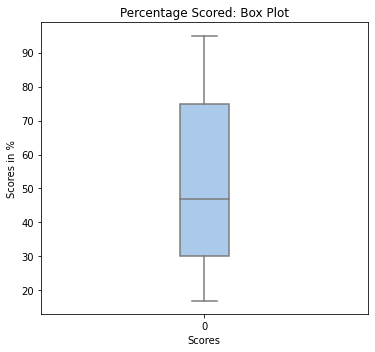

In [9]:
import seaborn as sns #loading the seaborn library.

#Plotting a box plot for scores.
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(122)
sns.boxplot(data=Scores,palette='pastel',width=0.15,ax=ax)
ax.set_title('Percentage Scored: Box Plot')
ax.set_ylabel('Scores in %')
ax.set_xlabel('Scores')
plt.tight_layout()
plt.show()

#### From the box plot it is observed that there does not exist any outliers in the scores dataset. It can be found from the plot that the average score is 51.5% and the median score is 47%. By median scores to be 47% it is meant that 50% of students scored less than 47%  and  50% of students scored more than 47% in academics. Also it is observed that the scores are positively skewed which indicates that the proportion of student who scored more than median score that is 47% is more. 

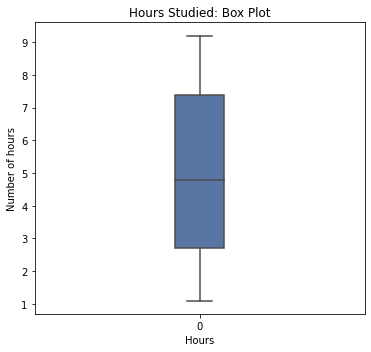

In [10]:
#Plotting a box plot for hours studied.
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(122)
sns.boxplot(data=Hours,palette='deep',width=0.15,ax=ax)
ax.set_title('Hours Studied: Box Plot')
ax.set_ylabel('Number of hours')
ax.set_xlabel('Hours')
plt.tight_layout()
plt.show()

#### From the box plot it is observed that there does not exist any outliers in the study hours dataset. It can be found from the plot that the average study hours is 5 hrs and the median study hours is 4.8 hours. Also, it is observed that the study hours are positively skewed which indicates that the proportion of student who spent more than median hours that is 4.8 hours of time in studying is more. By median study hours to be 4.8 it means that 50% of students spend less than 4.8 hours of time for studying and 50% of students spend more than 4.8 hours of time for studying.

Obtaining the five-point summary of the dataset to get the overall description of the dataset. 

In [11]:
student_data.describe().transpose() #obtaining the summary

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


#### From the above summary of the dataset, we observe that the maximum number of hours a student studies is 9.2 hours and it is also observed that lower quartile is 2.7 for no. of hours which means that 25% of students spend less than 2.7 hours for studying.

Plotting the data points on a 2-D graph to see if we can manually find any relationship between the data.

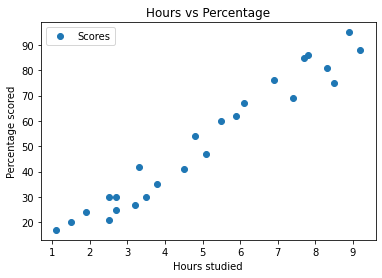

In [12]:
#Plotting the student data.
student_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

#### From the graph, we clearly see that there is a strongly positive relationship between hours studied and percentage scored by a student.

In [13]:
#Obtaining the correlation coefficient between the variables in the data.
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Since the correlation of coefficient between the percentage scores and no. of hours studied is 0.97 which is highly positive this means that the variables are highly positively related i.e. increase in one variable(study hours) causes the the increase another variable(percentage scores).

Preparing the data

The next step is to divide the data into "attributes"(inputs) and "labels"(outputs).

In [14]:
X=student_data.iloc[:, :-1].values
y=student_data.iloc[:,1].values

Now since we have our attributes and labels we try to split the data into training and testing sets using Scikit-Learn's built-in train_test_split() method.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Algorithm

After splitting the data, next step is to train the algorithm.

In [27]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

print('Training of data is done.')
regressor.score(X_test,y_test)

Training of data is done.


0.9454906892105355

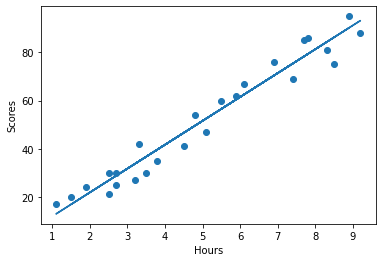

In [25]:
#Plotting the regression line
line=regressor.coef_*X+regressor.intercept_

#Plotting for the test data.
plt.scatter(X,y)
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Thus it can be seen from the above plot that all the points lies around the regression line, hence we can claim that the model is a good fit to the data.

In [26]:
#Obtaining the summary of the fitted model.
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [9.91065648]
Intercept: 2.0181600414346974


#### CONCLUSION:

#### From the above results,

#### We observe that the coefficient of determination value is 0.94 which means that this model can explain 94% of variability in the dependent variable i.e. Scores. Since this value is higher than 0.5, we can say that the model that we have is a good fit for the data.

#### The model can be formulated as follows, 

#### Scores = 2.0181 + 9.91065*Hours

#### Thus, we see that the percentage scored by a student is having a positive relationship with the hours the spent for studying, therefore it can be concluded that more no. of hours a student will spend in studying, higher percentage he will score.

#### It is also observed from the model that the regression coefficient is 9.91065 which indicates that when a student increases his studying hour by 1 hour the percentage score for that student will increase by 9.91%.

#### We can also see that the intercept is 2.0181 which means that when a student does not take out time for studying at all (i.e. 0 hours) then his percentage score will be 2.0181.

Making Prediction

Now that the training is done, the next step is to make predictions.

In [19]:
print(X_test) #Testing data for hours
y_pred = regressor.predict(X_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### The above are the predicted scores obtained using the trained model for test data of hours.

In [20]:
#comparing actual vs predicted.
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### The above table gives the actual values of scores and their corresponding predicted score values obtained using the fitted model.

### PREDICTION

In [22]:
#Predicting the score when a student studied for 9.25 hours in a day.
hour=9.25
own_pred=regressor.predict(hour)
print("No of Hours studied= {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours studied= 9.25
Predicted Score = 93.69173248737535


#### Thus, it is observed that the a student who studies for 9.25 hours will score 93.9%. 

### EVALUATING THE MODEL

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well our algorithms perform on a this dataset. For simplicity here, we have chosen the mean square error.

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


#### We observe that mean absolute error is 4.1835 which means that, on average the predicted scores's distance from actual score is 4.183.

THANK YOU..